In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
from wordcloud import WordCloud 
from nltk.corpus import stopwords
import matplotlib
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [3]:
#train data read
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df_select = df[['text','target']]
df_select.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df_select.groupby('target').count()

,text
target,
0,4342
1,3271


In [7]:
df_select['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Mean overview length:  101.03743596479706
Min overview length:  7
Max overview length:  157


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Frequency'>

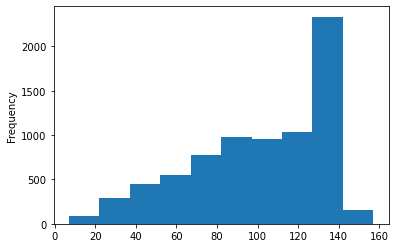

In [8]:
df_select['overview_length'] = df_select.text.apply(len)
print("Mean overview length: ", df_select['overview_length'].mean())
print("Min overview length: ", df_select['overview_length'].min())
print("Max overview length: ", df_select['overview_length'].max())
df_select.overview_length.plot.hist()

Build Features From Text
* CountVectorizer
* TFIDF
* WordEmbedding
* HashingTF
* etc

Reference : 
1. https://www.nltk.org/api/nltk.tokenize.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#
3. https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
4. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


In [9]:
# for stopwords removal : vectorizer = CountVectorizer(stop_words='english')

df_select['Tokenized'] = df_select['text'].apply(lambda x : word_tokenize(x))
df_select.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,target,overview_length,Tokenized
0,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #, wildfires, evacua..."
4,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [10]:
df_select['Tokenized'][0]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [11]:

## Remove non english characters
exclude = set(string.punctuation)
#exclude


In [12]:
def remove_punct(row):
    row = " ".join(x for x in row if x not in exclude)
    return row

In [13]:
df_select['Removed_punct'] = df_select['Tokenized'].apply(remove_punct)
df_select.head()

,text,target,overview_length,Tokenized,Removed_punct
0,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #, ea...",Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac...",All residents asked to 'shelter in place are b...
3,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #, wildfires, evacua...","13,000 people receive wildfires evacuation ord..."
4,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #, ...",Just got sent this photo from Ruby Alaska as s...


In [14]:
df_select['Removed_punct'][0]

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'

In [15]:
## Remove numbers

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace


In [16]:
df_select['No_numbers']= df_select['Removed_punct'].apply(clean_text)
df_select.head()

,text,target,overview_length,Tokenized,Removed_punct,No_numbers
0,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #, ea...",Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac...",All residents asked to 'shelter in place are b...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #, wildfires, evacua...","13,000 people receive wildfires evacuation ord...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #, ...",Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...


In [17]:
#Lemmatization


lemmatizer = WordNetLemmatizer()
def lemm_text(row):
    row = " ".join(lemmatizer.lemmatize(x) for x in row.split())
    return row

In [18]:
df_select['lem text'] = df_select['No_numbers'].apply(lemm_text)
df_select.head()

,text,target,overview_length,Tokenized,Removed_punct,No_numbers,lem text
0,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #, ea...",Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...,our deed are the reason of this earthquake may...
1,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac...",All residents asked to 'shelter in place are b...,all residents asked to shelter in place are be...,all resident asked to shelter in place are bei...
3,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #, wildfires, evacua...","13,000 people receive wildfires evacuation ord...",people receive wildfires evacuation orders in ...,people receive wildfire evacuation order in ca...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #, ...",Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...,just got sent this photo from ruby alaska a sm...


In [19]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [20]:
'''
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
 '''       

'\n    if True:\n        text = text.split()\n        new_text = []\n        for word in text:\n            if word in contractions:\n                new_text.append(contractions[word])\n            else:\n                new_text.append(word)\n        text = " ".join(new_text)\n '

In [21]:

# Expand contractions
def clean_text(text):

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+','', text)
    #Remove numbers
    text = re.sub(r'\d+', '', text)
    #Remove stop words
    pat = r'\b(?:{})\b'.format('|'.join(stop))
    text = text.replace(pat, '')
    text = text.replace(r'\s+', ' ')
    return text.lower()
    #return text

In [22]:
df_select['test2']= df_select['text'].apply(clean_text)
df_select.head()

,text,target,overview_length,Tokenized,Removed_punct,No_numbers,lem text,test2
0,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #, ea...",Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...,our deed are the reason of this earthquake may...,our deeds are the reason of this earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac...",All residents asked to 'shelter in place are b...,all residents asked to shelter in place are be...,all resident asked to shelter in place are bei...,all residents asked to shelter in place are ...
3,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #, wildfires, evacua...","13,000 people receive wildfires evacuation ord...",people receive wildfires evacuation orders in ...,people receive wildfire evacuation order in ca...,people receive wildfires evacuation orders ...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #, ...",Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...,just got sent this photo from ruby alaska a sm...,just got sent this photo from ruby alaska as ...


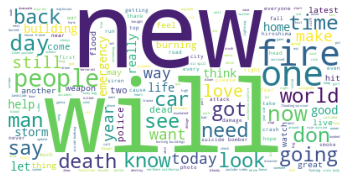

In [23]:
text = df_select['test2'].tolist()
#create the wordcloud object
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
# create a dictionary of word frequencies
text = df_select[df_select['target']==1]['test2'].tolist()
text = " ".join(text)
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_
#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])


[('fire', 147), ('new', 125), ('people', 77), ('will', 71), ('storm', 68)]
[('new', 1.0), ('will', 0.9004739336492891), ('fire', 0.8815165876777251), ('one', 0.8815165876777251), ('people', 0.8056872037914692)]


In [25]:
#VEctorization
Tf_vector = TfidfVectorizer()
vectors = Tf_vector.fit_transform(df_select['test2'])

In [26]:
vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
## Modeling
X_test, X_train, y_test, y_train = train_test_split(vectors, df_select['target'], test_size=0.30, random_state=42)

In [28]:
### Baseline model

#model = MultinomialNB()

In [29]:
### Model 2 
from sklearn import svm
model = svm.SVC()

In [30]:
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Train set score: 0.9772329246935202
Test set score: 0.7691874648151623


In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      3024
           1       0.88      0.54      0.67      2305

    accuracy                           0.77      5329
   macro avg       0.81      0.74      0.75      5329
weighted avg       0.80      0.77      0.76      5329



In [33]:
## Read test file
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [34]:
df_test['text']

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [35]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

### Add vectorization.transform function to pipeline and model.predict to pipeline
pipe_text = Pipeline([('col_test', FunctionTransformer(clean_text, validate=False))])
df_test['text'] = df_test['text'].apply(lambda x : pipe_text.fit_transform(str(x)))
df_test['text']

0                      just happened a terrible car crash
1       heard about  earthquake is different cities  s...
2       there is a forest fire at spot pond  geese are...
3                apocalypse lighting   spokane  wildfires
4             typhoon soudelor kills  in china and taiwan
                              ...                        
3258    earthquake safety los angeles  safety fastener...
3259    storm in ri worse than last hurricane  my city...
3260                    green line derailment in chicago 
3261          meg issues hazardous weather outlook  hwo  
3262     cityofcalgary has activated its municipal eme...
Name: text, Length: 3263, dtype: object

In [36]:
pipe_predict = Pipeline([('vector',Tf_vector),('model',model)])#,,('model',model)
predicted = pipe_predict.predict(df_test['text'])

In [37]:
## create submission file
sample_submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample_submission['target']= predicted


In [38]:
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [39]:
sample_submission.to_csv('submission.csv', index=False)